In [1]:
#implementando posicoes compradas e vendidas

In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [71]:
#calcula rsi
data = pd.read_excel('_cotacoes_completa_diario.xlsx')
filter_col = [col for col in data if col.startswith('close')]
dados = data[filter_col].copy()
rsi_period = 14
l_name = []
banana = dados.copy()
for i in dados:
    a = str(i).split()[1]
    chg = dados[i].diff(1) #variação em 1 vela
    gain = chg.mask(chg<0,0) #pega somente as variacoes positivas
    loss = chg.mask(chg>0,0) #pega somente as variacoes negativas
    avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean() #exponential weighted function
    avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
    rs = abs(avg_gain/avg_loss)
    rsi = 100-(100/(1+rs))
    dados['RSI '+a] = rsi

In [72]:
def opera(dados_rsiticker, gain):
    dic[_ticker] = {}
    dic[_ticker]['Qnt Trades'] = 0
    dic[_ticker]['Resultado'] = 0
    dic[_ticker]['Periodo Carregando'] = []

    posicao = 0 #vendido/neutro/comprado
    resultado = 0 
    preco_venda = 0
    preco_compra = 0
    carteira = 0
    _carteira = 0 #carteira provisória pra evitar bug
    dias_carregando = 0

    for i in dados_rsiticker.index:
        rsi = dados_rsiticker[dados_rsiticker.index == i].values[0]
        preco_acao = dados[ticker][dados[ticker].index == i].values[0]
        #operar vendido
        if rsi >= 70:
            if posicao == 0: #só vende se estiver neutro
                posicao -=1 #agora está vendido em 1
                preco_venda = preco_acao #salva o preço de venda
                _carteira += preco_acao #soma na carteira o valor da ação
                 #print(f'vendeu {a} a: {preco_compra}')     
                dias_carregando = i
        #comprar
        elif rsi <= 30:
            if posicao == 0:
                posicao += 1 #tá comprado
                preco_compra = preco_acao #guarda o preço da compra
                _carteira -= preco_acao #debita o valor da compra
                dias_carregando = i
        #realizar lucro vendido
        elif preco_venda - preco_acao >= gain*preco_venda and posicao == -1:
            #se tiver vendido e lucro de 4%
            _carteira -= preco_acao #credita o valor da ação vendida
            posicao += 1
            dic[_ticker]['Qnt Trades'] += 1
            carteira = _carteira
            dic[_ticker]['Periodo Carregando'].append(i-dias_carregando)
            dias_carregando = 0 
        #realizar comprado
        elif preco_acao - preco_compra >= gain*preco_compra and posicao == 1:
            #se tiver comprado e com lucro 
            _carteira += preco_acao #credita o valor da ação vendida
            posicao -= 1
            dic[_ticker]['Qnt Trades'] += 1
            carteira = _carteira
            dic[_ticker]['Periodo Carregando'].append(i-dias_carregando)
            dias_carregando = 0 
        #desmontar operacao comprado
        elif rsi >=50 and preco_acao - preco_compra <= -gain*preco_venda and posicao == 1:
            #se tiver comprado -> zerar preju 
            _carteira += preco_acao #credita o valor da ação vendida
            posicao -= 1
            dic[_ticker]['Qnt Trades'] += 1
            carteira = _carteira
            dic[_ticker]['Periodo Carregando'].append(i-dias_carregando)
            dias_carregando = 0 
        #desmontar operacao vendido 
        elif preco_venda - preco_acao <= -gain*preco_venda and posicao == -1:
            #se tiver vendido e no preju
            _carteira -= preco_acao #credita o valor da ação vendida
            posicao += 1
            dic[_ticker]['Qnt Trades'] += 1
            carteira = _carteira
            dic[_ticker]['Periodo Carregando'].append(i-dias_carregando)
            dias_carregando = 0
            
    dic[_ticker]['Resultado'] = carteira
    return dic  

In [73]:
doc = {}
l = [.04,.15]
#posicao 1 - comprado,
#0 - neutro, 
#(-1) - vendido

#seleciona os tickers com 'Close'
for pct in l:
    valor_carteira = 0
    dic = {}
    for ticker in dados.iloc[:,1:54]:
        _ticker = (ticker.split()[1])
        rsi_ticker = ('RSI '+_ticker)
        cotacoes = dados[rsi_ticker]        
        opera(cotacoes,pct) #executa função para compra e venda para cada acao
        doc[str(pct)] = dic
        

In [74]:
#deixa no formato para saber o resultado - quantidade/financeiro
total_operacoes = {}
lista_operacoes = []
lista_resultados = []
total_resultado = {}
lista_tempo = []
total_tempo = {}
for k,v in doc.items():
    for a,b in v.items():
        lista_operacoes.append(b['Qnt Trades'])
        lista_resultados.append(b['Resultado'])
        for temp in b['Periodo Carregando']:
            lista_tempo.append(temp)
        
    total_operacoes[str(k)] = lista_operacoes
    total_resultado[str(k)] = lista_resultados
    total_tempo[str(k)] = lista_tempo
    #reseta listas
    lista_operacoes = []
    lista_resultados = []
    lista_tempo = []


In [75]:
# f= open("results.txt","w+")
# f.write('Documento para registrar resultados\n')
# f.close()

In [76]:
# with open('guru99.txt','a') as salva:  
for k,v in total_operacoes.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Resumo numero de operacoes para pct={k}')
    print(f'sum: {s:.2f} mean: {m:.2f} desvio padrao: {std:.2f}\n')
#     salva.write('Resumo numero de operacoes para pct={k}')

Resumo numero de operacoes para pct=0.04
sum: 2136.00 mean: 40.30 desvio padrao: 7.38

Resumo numero de operacoes para pct=0.15
sum: 1063.00 mean: 20.06 desvio padrao: 5.56



In [77]:
for k,v in total_resultado.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Resumo FINANCEIRO pct={k} (volume de 1 ação)')
    print(f'sum: ${s:.2f} mean: ${m:.2f} desvio padrao: ${std:.2f}\n')

Resumo FINANCEIRO pct=0.04 (volume de 1 ação)
sum: $103.02 mean: $1.94 desvio padrao: $8.96

Resumo FINANCEIRO pct=0.15 (volume de 1 ação)
sum: $-199.48 mean: $-3.76 desvio padrao: $15.87



In [78]:
for k,v in total_tempo.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Dias carregando p/ {k} (volume de 1 ação)')
    print(f'Sum: {s:.2f} dias  | Mean: {m:.2f} dias | Desvio Padrao: {std:.2f} dias\n')

Dias carregando p/ 0.04 (volume de 1 ação)
Sum: 30477.00 dias  | Mean: 14.27 dias | Desvio Padrao: 14.53 dias

Dias carregando p/ 0.15 (volume de 1 ação)
Sum: 76759.00 dias  | Mean: 72.21 dias | Desvio Padrao: 66.39 dias



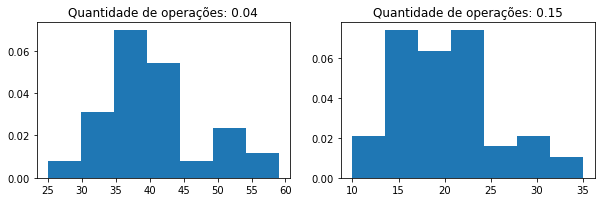

In [79]:
import matplotlib
fig = plt.figure(figsize=(10, 20))
contador =1

for k,v in total_operacoes.items():
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
    plt.subplot(5, 2, contador)
    contador +=1
    plt.title(("Quantidade de operações: "+k))
    plt.hist(v,density=True,bins=7)
        
plt.show()

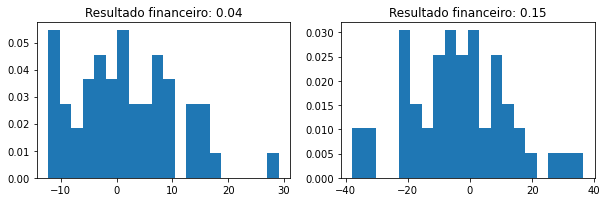

In [80]:
fig = plt.figure(figsize=(10, 20))
contador =1
for k,v in total_resultado.items():
    matplotlib.pyplot.subplots_adjust(hspace=.5)
    plt.subplot(5, 2, contador)
    contador +=1
    plt.title(("Resultado financeiro: "+k))
    plt.hist(v,density=True,bins=20)

In [81]:
# import scipy.stats as st
# fig = plt.figure(figsize=(10, 20))
contador =1
for k,v in total_tempo.items():
    a = pd.DataFrame(v)
    print(a.describe())
#     print(v)
    
#     matplotlib.pyplot.subplots_adjust(hspace=.5)
#     plt.subplot(5, 2, contador)
#     contador +=1
#     plt.title(("Tempo de carregamento: "+k))
#     plt.hist(v,density=True,bins=5,range=[1,30])

                 0
count  2136.000000
mean     14.268258
std      14.535675
min       1.000000
25%       4.000000
50%      10.000000
75%      19.000000
max     144.000000
                 0
count  1063.000000
mean     72.209784
std      66.420111
min       1.000000
25%      28.000000
50%      51.000000
75%      92.000000
max     504.000000
